# Inflow analysis

Try to find correlation between rainfall and water inflow in the the pipe.

In [1]:
import datetime
import calendar
import json
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

# Load project and prepare data

In [2]:
PROJECT_FOLDER = '../../datasets/radon-medium/'

def load_series(fname, name):
    path = PROJECT_FOLDER + fname + '.csv'
    xs = pd.read_csv(path, parse_dates=['time'])
    xs = xs.set_index('time')[name].fillna(0)
    xs = xs.resample('5T').pad()
    xs = xs.rename(fname)
    return xs


flow = load_series('flow1', 'flow')

rainfall = load_series('rainfall1', 'rainfall')

data_frame = pd.concat([flow, rainfall], axis=1)
data_frame['day'] = data_frame.index.map(lambda x: x.date())
data_frame = data_frame['2015-01-01': '2017-11-09']
print(data_frame.head())
print(data_frame.tail())

                         flow1  rainfall1         day
time                                                 
2015-01-01 00:00:00  78.823810        0.0  2015-01-01
2015-01-01 00:05:00  78.472910        0.0  2015-01-01
2015-01-01 00:10:00  78.211464        0.0  2015-01-01
2015-01-01 00:15:00  76.295780        0.0  2015-01-01
2015-01-01 00:20:00  76.811760        0.0  2015-01-01
                         flow1  rainfall1         day
time                                                 
2017-11-09 23:35:00  73.019640        0.0  2017-11-09
2017-11-09 23:40:00  72.679214        0.0  2017-11-09
2017-11-09 23:45:00  72.036860        0.0  2017-11-09
2017-11-09 23:50:00  71.264630        0.0  2017-11-09
2017-11-09 23:55:00  69.506360        0.0  2017-11-09


Add column for different rolling windon operation on rainfall data. This will help to find dry weather patterns and also we will use it to try to find correlation betwee nrainfall intensity and eccessive flow.

In [4]:
data_frame['precipitation_1h'] = data_frame.rainfall1.rolling(12).sum()
data_frame['precipitation_2h'] = data_frame.rainfall1.rolling(2*12).sum()
data_frame['precipitation_4h'] = data_frame.rainfall1.rolling(4*12).sum()
data_frame['precipitation_8h'] = data_frame.rainfall1.rolling(8*12).sum()
data_frame['precipitation_24h'] = data_frame.rainfall1.rolling(24*12).sum()
data_frame['precipitation_48h'] = data_frame.rainfall1.rolling(48*12).sum()
data_frame[pd.Timestamp('2017-05-01'):pd.Timestamp('2017-05-02')].head(10)

,flow1,rainfall1,day,precipitation_1h,precipitation_2h,precipitation_4h,precipitation_8h,precipitation_24h,precipitation_48h
time,,,,,,,,,
2017-05-01 00:00:00,73.687400,0.2,2017-05-01,0.2,2.2,9.2,9.8,12.0,12.0
2017-05-01 00:05:00,72.406334,0.4,2017-05-01,0.6,2.4,9.6,10.2,12.4,12.4
2017-05-01 00:10:00,71.094600,0.2,2017-05-01,0.8,2.2,9.8,10.4,12.6,12.6
2017-05-01 00:15:00,69.332985,0.0,2017-05-01,0.8,2.0,9.8,10.4,12.6,12.6
2017-05-01 00:20:00,68.958290,0.0,2017-05-01,0.8,1.8,9.8,10.4,12.6,12.6
2017-05-01 00:25:00,68.965805,0.0,2017-05-01,0.8,1.4,9.4,10.4,12.6,12.6
2017-05-01 00:30:00,68.949220,0.0,2017-05-01,0.8,1.4,9.4,10.4,12.6,12.6
2017-05-01 00:35:00,68.404340,0.4,2017-05-01,1.2,1.8,9.8,10.8,13.0,13.0
2017-05-01 00:40:00,68.247986,0.0,2017-05-01,1.2,1.8,9.8,10.8,13.0,13.0


# Dry Weather Pattern

Dry Weather Pattern is daily flow when we know that there was no precipitation at least 8h before this day and during this day

## Mean DWP

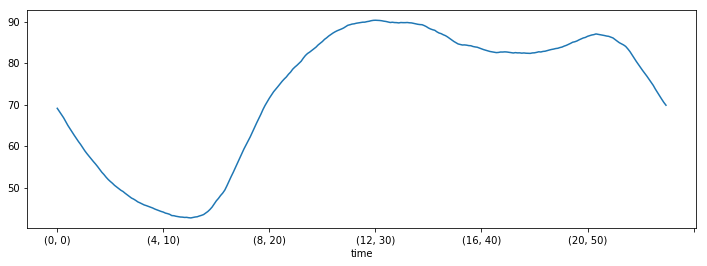

In [6]:
df = data_frame[data_frame.precipitation_24h < 0.1].reset_index()
daily_pattern = df.groupby(by=[df.time.map(lambda x : (x.hour, x.minute))]).flow1.mean()
daily_pattern.plot()
plt.show()

## How the DWP changes during the year

### 24h hours after the rain

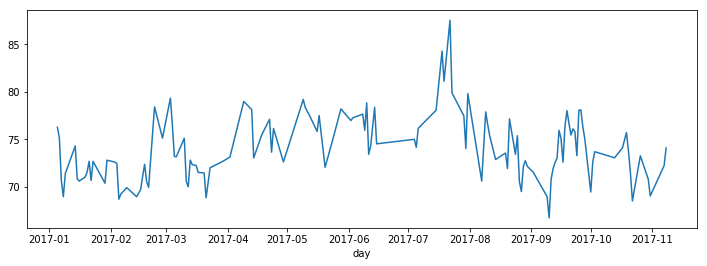

In [8]:
df = data_frame['2017-01-01':].groupby(by=['day']).mean()
days = df[df.precipitation_24h < 0.1]
days.flow1.plot()
plt.show()

### 48h hours after the rain

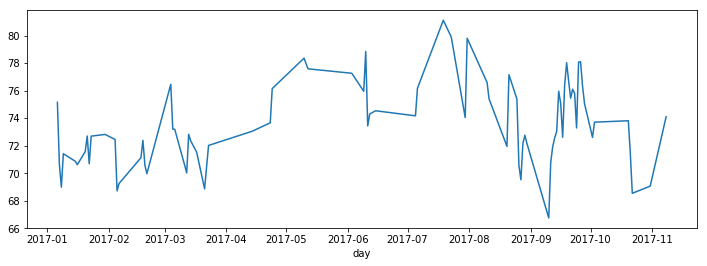

In [11]:
df = data_frame['2017-01-01':].groupby(by=['day']).mean()
days = df[df.precipitation_48h < 0.1]
days.flow1.plot()
plt.show()

## Explore some storms

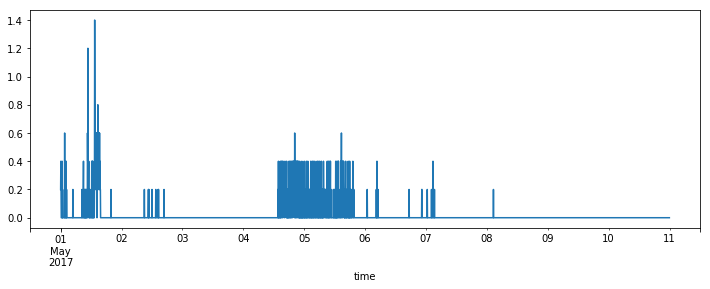

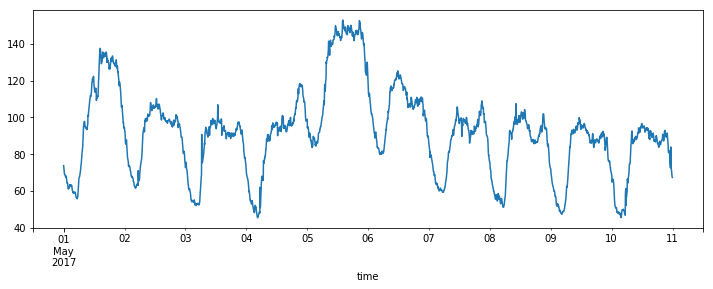

In [12]:
df = data_frame['2017-05-01':'2017-05-10']
df.rainfall1.plot()
plt.show()
df.flow1.plot()
plt.show()

## Add inflow data based on daily pattern

In [13]:
def inflow(row):
    pattern_idx = (row.name.hour, row.name.minute)
    pattern_value = daily_pattern[pattern_idx]
    return row.flow1 - pattern_value


data_frame['inflow'] = data_frame.apply(inflow, axis=1)
data_frame.tail()

,flow1,rainfall1,day,precipitation_1h,precipitation_2h,precipitation_4h,precipitation_8h,precipitation_24h,precipitation_48h,inflow
time,,,,,,,,,,
2017-11-09 23:35:00,73.019640,0.0,2017-11-09,2.403633e-14,-2.725598e-14,-1.942890e-15,0.6,0.6,0.6,0.115967
2017-11-09 23:40:00,72.679214,0.0,2017-11-09,2.403633e-14,-2.725598e-14,-1.942890e-15,0.6,0.6,0.6,0.553257
2017-11-09 23:45:00,72.036860,0.0,2017-11-09,2.403633e-14,-2.725598e-14,-1.942890e-15,0.6,0.6,0.6,0.750148
2017-11-09 23:50:00,71.264630,0.0,2017-11-09,2.403633e-14,-2.725598e-14,-1.942890e-15,0.6,0.6,0.6,0.754776
2017-11-09 23:55:00,69.506360,0.0,2017-11-09,2.403633e-14,-2.725598e-14,-1.942890e-15,0.6,0.6,0.6,-0.340595


# Check rainfall - inflow correlation

## Check 1 hour precipitation correlation

y = 2.203x + 7.366


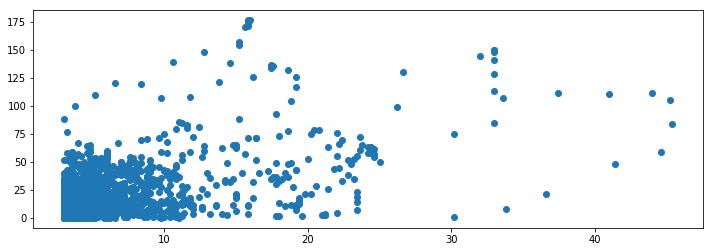

In [14]:
df = data_frame[(data_frame.precipitation_1h > 3) & (data_frame.inflow < 2000) & (data_frame.inflow > 0)]
slope, intercept, r_value, p_value, std_err = stats.linregress(df.precipitation_1h, df.inflow)
print('y = {:.4}x + {:.4}'.format(slope, intercept))
plt.scatter(df.precipitation_1h, df.inflow)
plt.show()

## Check 2 hours precipitation correlation

y = 1.644x + 6.965


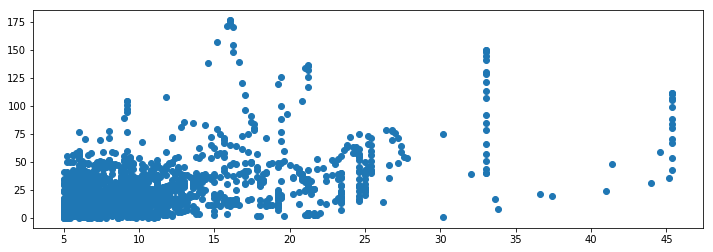

In [15]:
df = data_frame[(data_frame.precipitation_2h > 5) & (data_frame.inflow < 200) & (data_frame.inflow > 0)]
slope, intercept, r_value, p_value, std_err = stats.linregress(df.precipitation_2h, df.inflow)
print('y = {:.4}x + {:.4}'.format(slope, intercept))
plt.scatter(df.precipitation_2h, df.inflow)
plt.show()

## Check 4 hours precipitation correlation

y = 0.7715x + 11.1


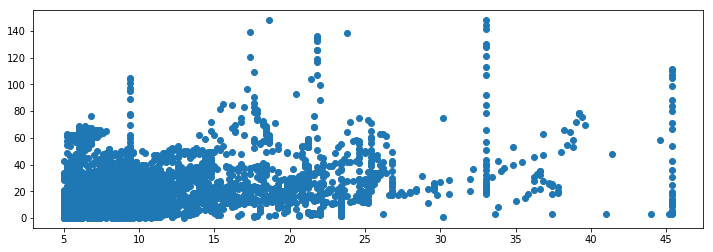

In [16]:
df = data_frame[(data_frame.precipitation_4h > 5) & (data_frame.inflow < 150) & (data_frame.inflow > 0)]
slope, intercept, r_value, p_value, std_err = stats.linregress(df.precipitation_4h, df.inflow)
print('y = {:.4}x + {:.4}'.format(slope, intercept))
plt.scatter(df.precipitation_4h, df.inflow)
plt.show()

## Check 8 hours precipitation correlation

y = 0.7286x + 7.428


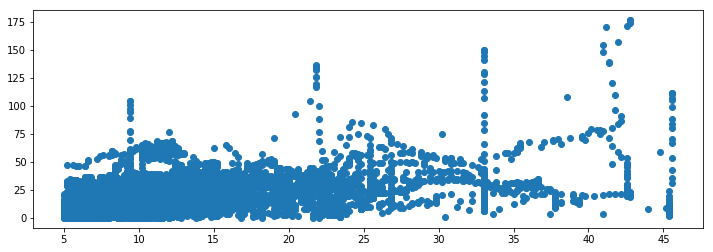

In [17]:
df = data_frame[(data_frame.precipitation_8h > 5) & (data_frame.inflow < 200) & (data_frame.inflow > 0)]
slope, intercept, r_value, p_value, std_err = stats.linregress(df.precipitation_8h, df.inflow)
print('y = {:.4}x + {:.4}'.format(slope, intercept))
plt.scatter(df.precipitation_8h, df.inflow)
plt.show()

# Analysis of days with very high inflow

In [21]:
set(data_frame[data_frame.inflow > 100].index.date)

{datetime.date(2016, 8, 13),
 datetime.date(2017, 6, 17),
 datetime.date(2017, 6, 23),
 datetime.date(2017, 7, 7),
 datetime.date(2017, 7, 16)}

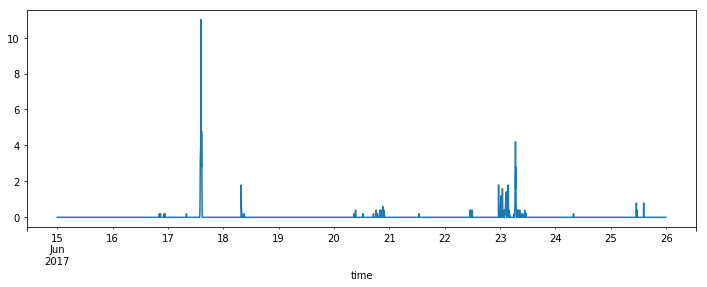

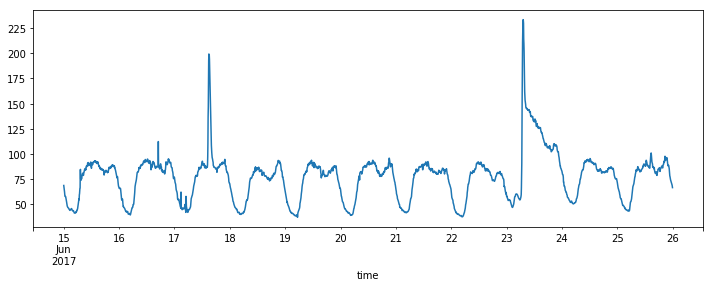

In [24]:
df = data_frame['2017-06-15': '2017-06-25']
df.rainfall1.plot()
plt.show()
df.flow1.plot()
plt.show()

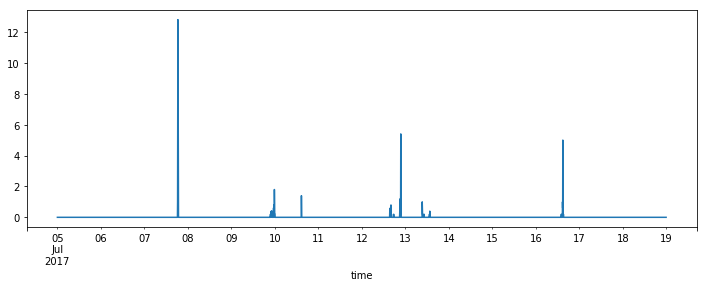

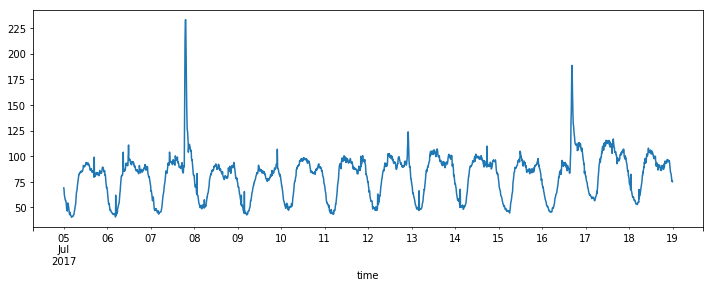

In [26]:
df = data_frame['2017-07-05': '2017-07-18']
df.rainfall1.plot()
plt.show()
df.flow1.plot()
plt.show()